In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import sys
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.patches import Patch
import seaborn as sns


# import custom functions
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from homer_preprocessing import read_homer_gene_exp, import_homer_diffgene, pull_comparisons_get_diff
from plotting_scripts import label_point, pca_rpkm_mat, get_diff_volcano, plot_exp_rpkm, gene_list_bar_plot

In [2]:
#### PLOTTING PARAMETERS FOR MANUSCRIPT ####
# # get matplotlib to save readable fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 6
matplotlib.rcParams['savefig.dpi'] = 500

# line widths
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1

# adjust defualt color for plots to black
# normal default is a dark gray
COLOR = 'black'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR
matplotlib.rcParams['axes.edgecolor'] = COLOR

#### PLOT PARAMETERS FOR THIS PLOT ####

In [3]:
def gene_list_bar_plot_illus(genes, data, groups,
                             group_labels, colors, width=0.5,
                             spacing=0.0, title='', ylabel='', xlabel='',
                             xticklabels=[],
                             ax=None):
    '''This function allows for visualization of expression in qPCR style
    bar plots for multiple genes contained in an rpkm data file.
    
        Accepts:
            genes (str): list of geneIDs to plot
            data (pandas DataFrame): dataset in gene x sample format with geneIDs as index
            groups (int): groups of samples in the columns of data
            group_labels (str): labels of each group in groups
            colors (str) = colors of each group in groups
            width (float) = width of bars to plot, default 0.5
            spacing (float) = extra spacing between bars to plot, default 0.0
            relative (bool) = whether to standardize plot so that first group mean is 1,
            ax (matplotlib.Axes object) = plot axis
        
        Returns:
            ax (matplotlib.Axes object) = gene list bar plot'''

    import pandas as pd
    import matplotlib.pyplot as plt    
    import numpy as np

    # calculate means and standard deviations for plotting
    # adjust if using a relative method (control group set to 1)
    # get mean and std
    means = []
    stds = []
    for (group, label) in zip(groups, group_labels):
        means.append(data.iloc[:, group].reindex(genes).mean(1))
        stds.append(data.iloc[:, group].reindex(genes).std(1))
    
    # set axis
    if ax==None:
        ax = plt.gca()
    

    # plot
    ind = np.arange(len(genes))
    ind = np.arange(len(genes))    # the x locations for the groups
    i = 0
    for mean, std, group, label, color in zip(means, stds, groups, group_labels, colors):
        ax.bar(ind + (width+spacing)*i,
               mean,
               width,
               color=color,
               yerr=[np.zeros(len(std)), std],
               edgecolor='k',
               linewidth=1,
               capsize=20,
               error_kw={'elinewidth':1,
                         'capthick':1,
                         'capsize':2},
               label=label)
        i+=1
        
    if len(xticklabels) > 0:
        ax.set_xticks([ind + (width+spacing)*i for i in np.arange(len(xticklabels))]);
        ax.set_xticklabels(xticklabels, fontsize=6);
    ax.legend(fontsize=6);
    ax.set_ylabel(ylabel, fontsize=8)
    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_title(title, fontsize=8)
    
    return ax

In [4]:
dataDirectory = '/home/h1bennet/strains_rna/results/K00_Strains_Control_Kupffer_RNA/'
workingDirectory = '/home/h1bennet/strains_rna/results/10_Strains_Manuscript_Prep/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

To do this analysis we will pull from the differential analysis performed by Ty at the following location:  

     /home/ttroutman/strainsKupffer/rnaKupfferNASH/
 

# Import differential gene files for examination and plotting

## Write differential genes to list for metascape

In [5]:
if not os.path.isdir('./gene_lists/'):
    os.mkdir('./gene_lists')

In [6]:
strains = ['aj', 'balb', 'c57']
log2fc = 1
padj = 0.05
diffpath = '/home/ttroutman/strainsKupffer/rnaKupfferNASH/rnaDiff/'

# single gene plots

In [10]:
if not os.path.isdir('./fancy_figures/'):
    os.mkdir('./fancy_figures')

In [11]:
tpm_mat = pd.read_csv('/home/ttroutman/strainsKupffer/rnaKupfferNASH/rnaQuan/rawT.txt',
                  index_col=0,
                  sep='\t')

In [12]:
groups = [[0,1],
          [2,3],
          [4,5]]

group_labels = ['AJ Kupffer',
                'Balb/cJ Kupffer',
                'C57BL/6J Kupffer']

colors = ['#de2d26',
          '#6baed6',
          '#74c476']

legend_elements = []
for lab, col in  zip(group_labels, colors):
    legend_elements.append(Patch(label=lab, color=col))

In [13]:
gene='Marco'

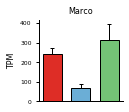

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(1.5,1.5))
# plt.subplots_adjust(wspace=0.8)


gene_list_bar_plot_illus([gene],
                   tpm_mat,
                   groups=groups,
                   group_labels = group_labels,
                   colors = colors,
                   xticklabels=group_labels,
                   title=gene,
                   xlabel='',
                   ylabel='',
                   spacing=0.025,
                   width = 0.05,
                   ax=ax)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_legend().remove()
ax.set_xticks([])
    
ax.set_ylabel('TPM');
# axs[3].legend(handles=legend_elements)
# axs[1][0].set_ylabel('Expression (TPM)');
# axs[2][0].set_ylabel('Expression (TPM)');

plt.savefig('./fancy_figures/%s_gene_expression.pdf' % gene,
            bbox_inches='tight')

In [9]:
tpm_mat.index[tpm_mat.index.str.contains('Spdef')]

Index(['Spdef'], dtype='object')

In [26]:
kc_identity_genes = ['Ckb', 'Ccl24', 'Nr4a1', 'Slc7a7', 'Trpm2']

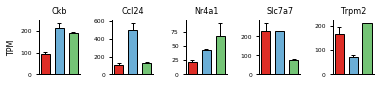

In [27]:
fig, axs = plt.subplots(1, 5, figsize=(6,1))
plt.subplots_adjust(wspace=0.8)


for gene, ax in zip(kc_identity_genes, axs.flat):
    gene_list_bar_plot_illus([gene],
                       tpm_mat,
                       groups=groups,
                       group_labels = group_labels,
                       colors = colors,
                       xticklabels=group_labels,
                       title=gene,
                       xlabel='',
                       ylabel='',
                       spacing=0.025,
                       width = 0.05,
                       ax=ax)
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.get_legend().remove()
    ax.set_xticks([])
    
axs[0].set_ylabel('TPM');
# axs[3].legend(handles=legend_elements)
# axs[1][0].set_ylabel('Expression (TPM)');
# axs[2][0].set_ylabel('Expression (TPM)');

plt.savefig('./kc_identity_gene_barplots/00_assorted_kc_identity_genes.pdf',
            bbox_inches='tight')

Other KC genes

In [22]:
kc_identity_genes = ['Nr1h3', 'Arg2', 'Kcna2', 'Cd5l', 'Il18bp']

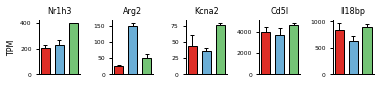

In [23]:
fig, axs = plt.subplots(1, 5, figsize=(6,1))
plt.subplots_adjust(wspace=0.8)


for gene, ax in zip(kc_identity_genes, axs.flat):
    gene_list_bar_plot_illus([gene],
                       tpm_mat,
                       groups=groups,
                       group_labels = group_labels,
                       colors = colors,
                       xticklabels=group_labels,
                       title=gene,
                       xlabel='',
                       ylabel='',
                       spacing=0.025,
                       width = 0.05,
                       ax=ax)
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.get_legend().remove()
    ax.set_xticks([])
    
axs[0].set_ylabel('TPM');
# axs[3].legend(handles=legend_elements)
# axs[1][0].set_ylabel('Expression (TPM)');
# axs[2][0].set_ylabel('Expression (TPM)');

plt.savefig('./kc_identity_gene_barplots/00_curated_kc_identity_genes.pdf',
            bbox_inches='tight')